# Pre-Class 4.1

In [36]:
import matplotlib
import pylab
import random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [16]:
class TrafficSimulator(object):
    
    def __init__(self, length=50, density=0.2, vMax=5, slowProb=0.5):
        '''
        Initialize new TrafficSimulator objects with the default parameter
        settings. 

        Inputs:

         * length (int): The number of cells in the cellular automaton.
           Default: 50.

         * density (float): The proportion of cells that will be active (contain
           a car) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. Default: 0.2.
           
        * vMax (int): The maximum velocity of the cars. Default: 5.
        
        * slowProb (float): The probability of a car to randomly slow down. 
          Default: 0.5.
        

        '''
        self.length = length
        self.density = density
        self.vMax = vMax
        self.slowProb = slowProb
        self.flowPerStep = []

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = np.ones(self.length) * -1
        self.next_state = np.ones(self.length) * -1

    def initialize(self, initSpeed_zero=True):
        '''
        Initialize the state - set up cars in place and give an initial speed. 
        
        * initSpeed_zero (bolean): if True, set all initial velocities to zero. 
          If False, set the veloities to the maximum possible.
        
        '''
        # Set up a random initial state where the fraction of 0s in the array
        # equals the density parameter.
        random_indices = np.random.choice(
            range(self.length),
            size=int(round(self.density * self.length)),
            replace=False)
        self.current_state.fill(-1)
        self.current_state[random_indices] = 0
        
        if not initSpeed_zero:
            # Set the velocities to the max possible (i.e, distant - 1 or max velocity)
            for i in range(self.length):
                if self.current_state[i] != -1:
                    for j in range(1, self.vMax+1):
                        if self.current_state[(i+j)%self.length] != -1:
                            dist = j
                            break
                        dist = self.vMax+1
                    self.current_state[i] = dist-1

        self.time = 0
        
    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        print(''.join('.' if x == -1 else str(int(x)) for x in self.current_state))

    def update_velocities(self):
        '''
        Update all velocities according to rules 1-3.
        '''
        for i in range(self.length):
            if self.current_state[i] != -1:
                # Calculate the distance to next car (if distance is long, set as vMax+1)
                for j in range(1, self.vMax+1):
                    if self.current_state[(i+j)%self.length] != -1:
                        dist = j
                        break
                    dist = self.vMax+1
                # Rule 1: acceleration
                if (self.current_state[i] < self.vMax) and (dist > self.current_state[i]+1):
                    self.current_state[i] += 1
                # Rule 2: slowing down
                if self.current_state[i] >= dist:
                    self.current_state[i] = dist-1
                # Rule 3: randomization
                if self.current_state[i] != 0:
                    if random.random() < self.slowProb:
                        self.current_state[i] -= 1
        
    def step(self):
        '''
        Update the positions based on updated velocities according to rule 4.
        '''
        # Update the new positions (rule 4)
        current_flow = 0
        self.next_state = np.ones(self.length) * -1
        for i in range(self.length):
            if self.current_state[i] != -1:
                self.next_state[int((i + self.current_state[i])%self.length)] = self.current_state[i]
                if i + self.current_state[i] >= self.length:
                    current_flow += 1
        
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        self.time += 1
        self.flowPerStep.append(current_flow)



## Nagel & Schreckenberg - figure 1

In [8]:
sim = TrafficSimulator(length=100, density=0.03, vMax=5, slowProb=0.5)
sim.initialize()
sim.current_state
# sim.draw()
for i in range(20):
    sim.update_velocities()
    sim.draw()
    sim.step()

................0.......0..........................................................1................
................0.......0...........................................................2...............
................1.......1.............................................................3.............
.................2.......2...............................................................4..........
...................3.......3.................................................................5......
......................3.......3...................................................................5.
...5.....................3.......4..................................................................
........5...................4........5..............................................................
.............5..................4.........5.........................................................
..................4.................5..........4...........................................

In [9]:
print(sim.flowPerStep)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Nagel & Schreckenberg - figure 2

In [19]:
sim = TrafficSimulator(length=100, density=0.1, vMax=5, slowProb=0.5)
sim.initialize()
sim.current_state
# sim.draw()
for i in range(30):
    sim.update_velocities()
    sim.draw()
    sim.step()

..................01.1...0..........1.....0.....1...0...................1.......0...................
..................1.1.1..0...........1....1......2..1....................1......0...................
...................0.0.1.1............2....1.......0.1....................1.....0...................
...................0.1..1.2.............2...1......1..1....................2....1...................
...................1..2..2..3.............1..2......2..2.....................3...2..................
....................2...1..3...3...........2...2......2..3......................2..3................
......................1..2....3...3..........2...3......2...3.....................2...3.............
.......................1...2.....3...4.........3....4.....2....3....................2....4..........
........................1....2......4....5........3.....3...2.....4...................2......5......
.........................2.....2........4.....4......3.....1..2.......5.................3..

In [20]:
print(sim.flowPerStep)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]


In [5]:
%%time
sim = TrafficSimulator(length=10**6, density=0.03, vMax=5, slowProb=0.5)
sim.initialize()
sim.current_state
# sim.draw()
for i in range(1000):
    sim.update_velocities()
#     sim.draw()
    sim.step()

CPU times: user 14min 32s, sys: 267 ms, total: 14min 32s
Wall time: 14min 33s


## Nagel & Schreckenberg - figure 4

In [42]:
%%time
initial_density = np.arange(0, 0.8, 0.02)
flows = []
run_time = 400
Ntrials = 5

for dens in initial_density:
    flowsTemp = []
    for i in range(Ntrials):
        sim = TrafficSimulator(length=1000, density=dens, vMax=5, slowProb=0.5)
        sim.initialize()
        for i in range(run_time):
            sim.update_velocities()
            sim.step()
        flowsTemp.append(np.mean(sim.flowPerStep[run_time//2:]))
    flows.append(np.mean(flowsTemp))
    print("Density: {d}; Flow: {f}".format(d=dens, f=flows[-1]))

Density: 0.0; Flow: 0.0
Density: 0.02; Flow: 0.086
Density: 0.04; Flow: 0.178
Density: 0.06; Flow: 0.271
Density: 0.08; Flow: 0.319
Density: 0.1; Flow: 0.323
Density: 0.12; Flow: 0.302
Density: 0.14; Flow: 0.32799999999999996
Density: 0.16; Flow: 0.30300000000000005
Density: 0.18; Flow: 0.31
Density: 0.2; Flow: 0.284
Density: 0.22; Flow: 0.288
Density: 0.24; Flow: 0.27599999999999997
Density: 0.26; Flow: 0.28200000000000003
Density: 0.28; Flow: 0.29100000000000004
Density: 0.3; Flow: 0.26999999999999996
Density: 0.32; Flow: 0.251
Density: 0.34; Flow: 0.24300000000000002
Density: 0.36; Flow: 0.259
Density: 0.38; Flow: 0.257
Density: 0.4; Flow: 0.251
Density: 0.42; Flow: 0.211
Density: 0.44; Flow: 0.22000000000000003
Density: 0.46; Flow: 0.199
Density: 0.48; Flow: 0.217
Density: 0.5; Flow: 0.197
Density: 0.52; Flow: 0.20900000000000002
Density: 0.54; Flow: 0.172
Density: 0.56; Flow: 0.185
Density: 0.58; Flow: 0.164
Density: 0.6; Flow: 0.164
Density: 0.62; Flow: 0.17099999999999999
Densit

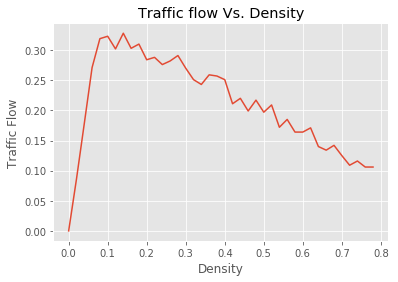

In [44]:
plt.plot(initial_density, flows)
plt.title("Traffic flow Vs. Density")
plt.xlabel("Density")
plt.ylabel("Traffic Flow")
# plt.legend()
plt.show()